In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [5]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0    #Normalization
y_train, y_test = to_categorical(y_train), to_categorical(y_test) # one hot encoding

In [6]:
hidden_units = (256, 128, 64)
activation = "relu"

In [7]:
import time

In [16]:
def createTester(model, name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    start = time.time()
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
    end = time.time()
    
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    
    r_test_loss = round(test_loss, 5)
    r_test_accuracy = round(test_accuracy * 100, 5)
    r_time = round(end - start, 3)
    
    print("\nModel:", name)
    print("test error =", r_test_loss)
    print("Accuracy =", r_test_accuracy, "%")
    print("time =", r_time, "seconds")
    
    return (
        model,
        r_test_loss,
        r_test_accuracy,
        r_time
    )

In [9]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [41]:
Normal_Model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation),
        Dense(hidden_units[1], activation=activation),
        Dense(hidden_units[2], activation=activation),
        Dense(10, activation='softmax')
])

In [10]:
# layers.Dropout
DropoutModel = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation), Dropout(.2),
        Dense(hidden_units[1], activation=activation), Dropout(.2),
        Dense(hidden_units[2], activation=activation), Dropout(.2),
        Dense(10, activation='softmax')
])

In [11]:
from tensorflow.keras.regularizers import l1, l2

In [18]:
# regularizers.l1
Regularizer_L1_Model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation, kernel_regularizer = l1(0.1)),
        Dense(hidden_units[1], activation=activation, kernel_regularizer = l1(0.1)),
        Dense(hidden_units[2], activation=activation, kernel_regularizer = l1(0.1)),
        Dense(10, activation='softmax')
])

In [19]:
# regularizers.l2
Regularizer_L2_Model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation, kernel_regularizer = l2(0.1)),
        Dense(hidden_units[1], activation=activation, kernel_regularizer = l2(0.1)),
        Dense(hidden_units[2], activation=activation, kernel_regularizer = l2(0.1)),
        Dense(10, activation='softmax')
])

In [27]:
# glorot_uniform
Glorot_Uniform_Model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation, kernel_initializer='glorot_uniform'),
        Dense(hidden_units[1], activation=activation, kernel_initializer='glorot_uniform'),
        Dense(hidden_units[2], activation=activation, kernel_initializer='glorot_uniform'),
        Dense(10, activation='softmax')
])

In [21]:
# he_normal
He_Normal_Model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(hidden_units[0], activation=activation, kernel_initializer='he_normal'),
        Dense(hidden_units[1], activation=activation, kernel_initializer='he_normal'),
        Dense(hidden_units[2], activation=activation, kernel_initializer='he_normal'),
        Dense(10, activation='softmax')
])

In [42]:
Normal_Model_Result = createTester(Normal_Model, "Normal_Model")

Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 1.8788 - accuracy: 0.3182 - val_loss: 1.6960 - val_accuracy: 0.3964
Epoch 2/5
782/782 [==============================] - 5s 7ms/step - loss: 1.6976 - accuracy: 0.3905 - val_loss: 1.6378 - val_accuracy: 0.4091
Epoch 3/5
782/782 [==============================] - 5s 7ms/step - loss: 1.6223 - accuracy: 0.4201 - val_loss: 1.6121 - val_accuracy: 0.4310
Epoch 4/5
782/782 [==============================] - 5s 7ms/step - loss: 1.5567 - accuracy: 0.4429 - val_loss: 1.5391 - val_accuracy: 0.4545
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.4880 - accuracy: 0.4642

Model: Normal_Model
test error = 1.48797
Accuracy = 46.42 %
time = 27.758 seconds


In [22]:
Regularizer_L1_Result = createTester(Regularizer_L1_Model, "Regularizer_L1_Model")

Epoch 1/5
782/782 [==============================] - 8s 9ms/step - loss: 63.2186 - accuracy: 0.0968 - val_loss: 12.3968 - val_accuracy: 0.1000
Epoch 2/5
782/782 [==============================] - 7s 9ms/step - loss: 12.3955 - accuracy: 0.0984 - val_loss: 12.3899 - val_accuracy: 0.1000
Epoch 3/5
782/782 [==============================] - 8s 10ms/step - loss: 12.3949 - accuracy: 0.0983 - val_loss: 12.4256 - val_accuracy: 0.1000
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 12.3951 - accuracy: 0.0997 - val_loss: 12.3538 - val_accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 12.4306 - accuracy: 0.1000

Model: Regularizer_L1_Model
test error = 12.43058
Accuracy = 10.0 %
time = 36.721 seconds


In [23]:
Regularizer_L2_Result = createTester(Regularizer_L2_Model, "Regularizer_L2_Model")

Epoch 1/5
782/782 [==============================] - 7s 8ms/step - loss: 4.4889 - accuracy: 0.1661 - val_loss: 2.2296 - val_accuracy: 0.1649
Epoch 2/5
782/782 [==============================] - 6s 8ms/step - loss: 2.1904 - accuracy: 0.1832 - val_loss: 2.1756 - val_accuracy: 0.1893
Epoch 3/5
782/782 [==============================] - 6s 8ms/step - loss: 2.1724 - accuracy: 0.1849 - val_loss: 2.1524 - val_accuracy: 0.1847
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 2.1633 - accuracy: 0.1855 - val_loss: 2.1512 - val_accuracy: 0.1896
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 2.1371 - accuracy: 0.1907

Model: Regularizer_L2_Model
test error = 2.13711
Accuracy = 19.07 %
time = 32.685 seconds


In [28]:
Glorot_Uniform_Result = createTester(Glorot_Uniform_Model, "Glorot_Uniform_Model")

Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 1.8861 - accuracy: 0.3166 - val_loss: 1.7853 - val_accuracy: 0.3644
Epoch 2/5
782/782 [==============================] - 5s 7ms/step - loss: 1.6963 - accuracy: 0.3900 - val_loss: 1.6470 - val_accuracy: 0.4143
Epoch 3/5
782/782 [==============================] - 5s 7ms/step - loss: 1.6059 - accuracy: 0.4253 - val_loss: 1.6032 - val_accuracy: 0.4254
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 1.5539 - accuracy: 0.4438 - val_loss: 1.5213 - val_accuracy: 0.4541
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.5498 - accuracy: 0.4466

Model: Glorot_Uniform_Model
test error = 1.5498
Accuracy = 44.66 %
time = 29.351 seconds


In [25]:
He_Normal_Result = createTester(He_Normal_Model, "He_Normal_Model")

Epoch 1/5
782/782 [==============================] - 6s 7ms/step - loss: 1.8974 - accuracy: 0.3142 - val_loss: 1.7421 - val_accuracy: 0.3742
Epoch 2/5
782/782 [==============================] - 5s 7ms/step - loss: 1.6974 - accuracy: 0.3904 - val_loss: 1.6917 - val_accuracy: 0.3892
Epoch 3/5
782/782 [==============================] - 5s 7ms/step - loss: 1.6237 - accuracy: 0.4162 - val_loss: 1.5865 - val_accuracy: 0.4314
Epoch 4/5
782/782 [==============================] - 5s 7ms/step - loss: 1.5651 - accuracy: 0.4395 - val_loss: 1.5475 - val_accuracy: 0.4513
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.5272 - accuracy: 0.4550

Model: He_Normal_Model
test error = 1.52724
Accuracy = 45.5 %
time = 27.315 seconds


In [26]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

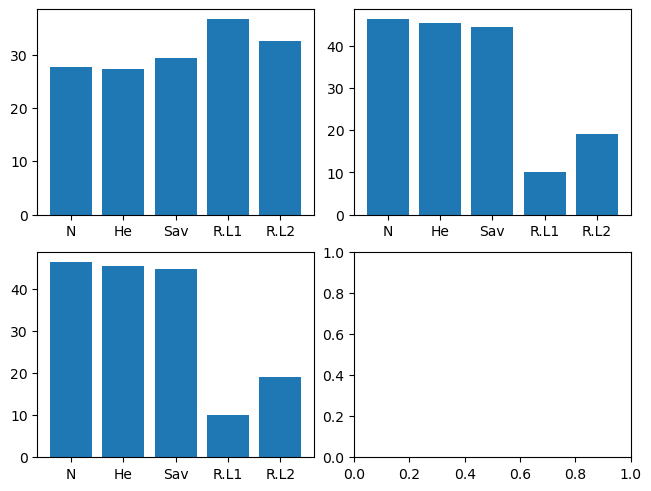

In [60]:
x_name = ["Normal", "He_Normal", "Savier", "Regularizer_L1", "Regularizer_L2"]
x = ["N", "He", "Sav", "R.L1", "R.L2"]

getY = lambda x: [
    Normal_Model_Result[x], 
    He_Normal_Result[x], 
    Glorot_Uniform_Result[x], 
    Regularizer_L1_Result[x], 
    Regularizer_L2_Result[x]
]

y_time = getY(3)
y_accuracy = getY(2)
y_loss = getY(1)

fig, ax  = plt.subplots(2, 2, layout="constrained")

ax_time = ax[0][0]
ax_acc = ax[0][1]
ax_loss = ax[1][0]

ax_time.bar(x, y_time)
ax_acc.bar(x, y_accuracy)
ax_loss.bar(x, y_accuracy)